In [3]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'C:\Users\hp\Downloads\Malignant-Comments-Classifier-Project--1-\Malignant Comments Classifier Project/train.csv')

In [5]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# EDA

In [6]:
df.shape

(159571, 8)

In [7]:
df['malignant'].unique()

array([0, 1], dtype=int64)

In [8]:
# classification problem

In [9]:
df.drop(columns=['id'],inplace=True)

In [10]:
df.shape

(159571, 7)

In [11]:
df.dtypes

comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [12]:
df.shape

(159571, 7)

In [13]:
df['comment_text'].value_counts()

"\n\n A-Class medal with Swords \n\n  The Military history A-Class medal with swords  On behalf of the coordinators of the Military History Wikiproject, I am pleased to award you the A-Class medal with Swords to recognise your fine work in developing the Hans Philipp, List of Knight's Cross of the Iron Cross recipients (Sa–Schr), and List of Knight's Cross of the Iron Cross recipients (Schu–Sz) article/lists to A-class status. And can I add my personal congratulations for your commitment, persistence and meticulous attention to detail in developing all of the ""List of Knight's Cross of the Iron Cross recipients"" lists to A-Class. That is truly a legacy to be proud of. A significant achievement. Well done.   (send... over) "                                                                                                 1
"\n took care of this one.  had pinged me but we were at the park, feeding the duckies; surely Favonian has done that before. If this keeps up an SPI might be helpful

<AxesSubplot:xlabel='highly_malignant', ylabel='rude'>

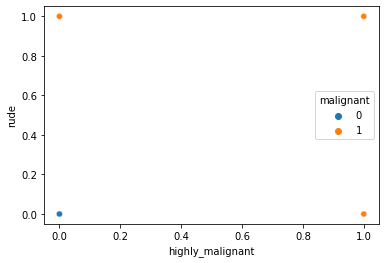

In [14]:
sns.scatterplot(x='highly_malignant',y='rude',data=df,hue='malignant')

<AxesSubplot:xlabel='highly_malignant', ylabel='threat'>

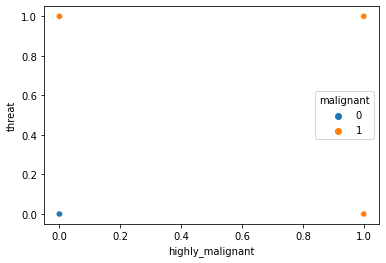

In [15]:
sns.scatterplot(x='highly_malignant',y='threat',data=df,hue='malignant')

<AxesSubplot:xlabel='highly_malignant', ylabel='abuse'>

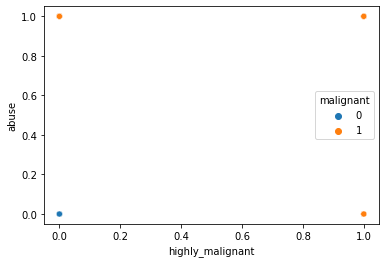

In [16]:
sns.scatterplot(x='highly_malignant',y='abuse',data=df,hue='malignant')

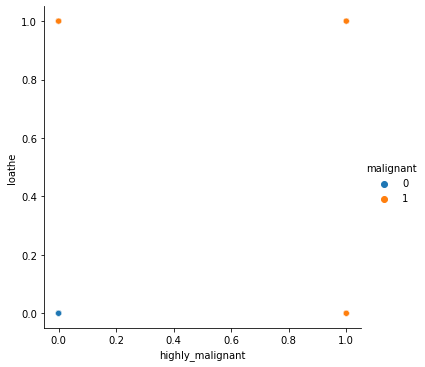

In [17]:
sns.relplot(x='highly_malignant',y='loathe',data=df,hue='malignant')

<AxesSubplot:xlabel='highly_malignant', ylabel='Density'>

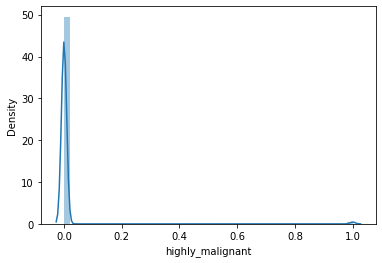

In [18]:
sns.distplot(df['highly_malignant'])

<AxesSubplot:xlabel='malignant', ylabel='Density'>

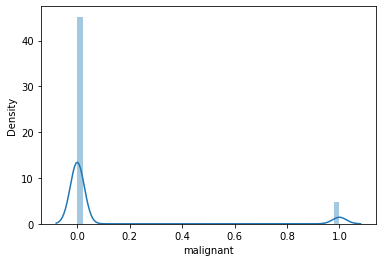

In [19]:
sns.distplot(df['malignant'])

<AxesSubplot:xlabel='rude', ylabel='Density'>

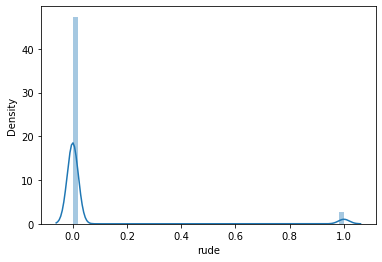

In [20]:
sns.distplot(df['rude'])

<AxesSubplot:xlabel='threat', ylabel='Density'>

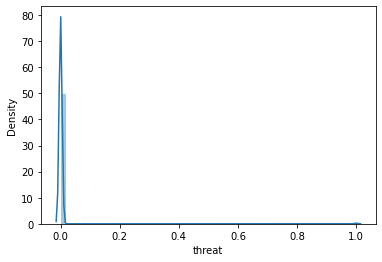

In [21]:
sns.distplot(df['threat'])

<AxesSubplot:xlabel='abuse', ylabel='Density'>

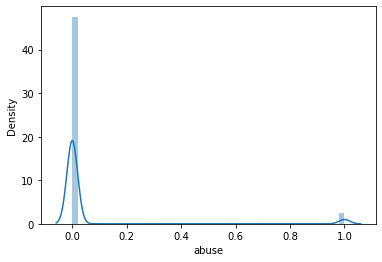

In [22]:
sns.distplot(df['abuse'])

<AxesSubplot:xlabel='loathe', ylabel='Density'>

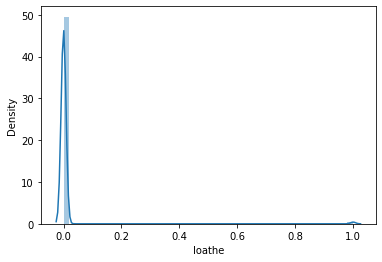

In [23]:
sns.distplot(df['loathe'])

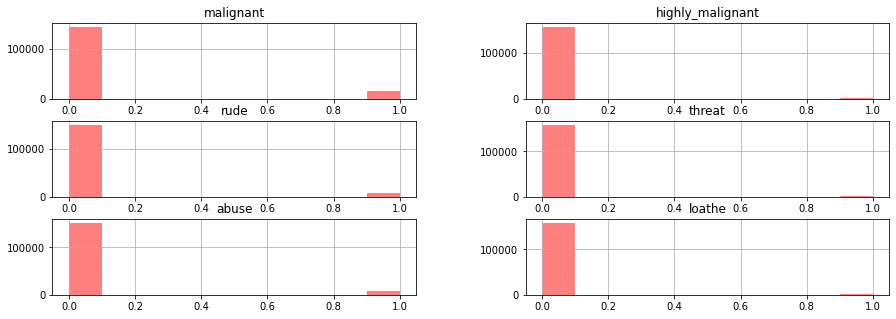

In [24]:
df.hist(color='r',alpha=0.50,figsize=(15,5))
plt.show()

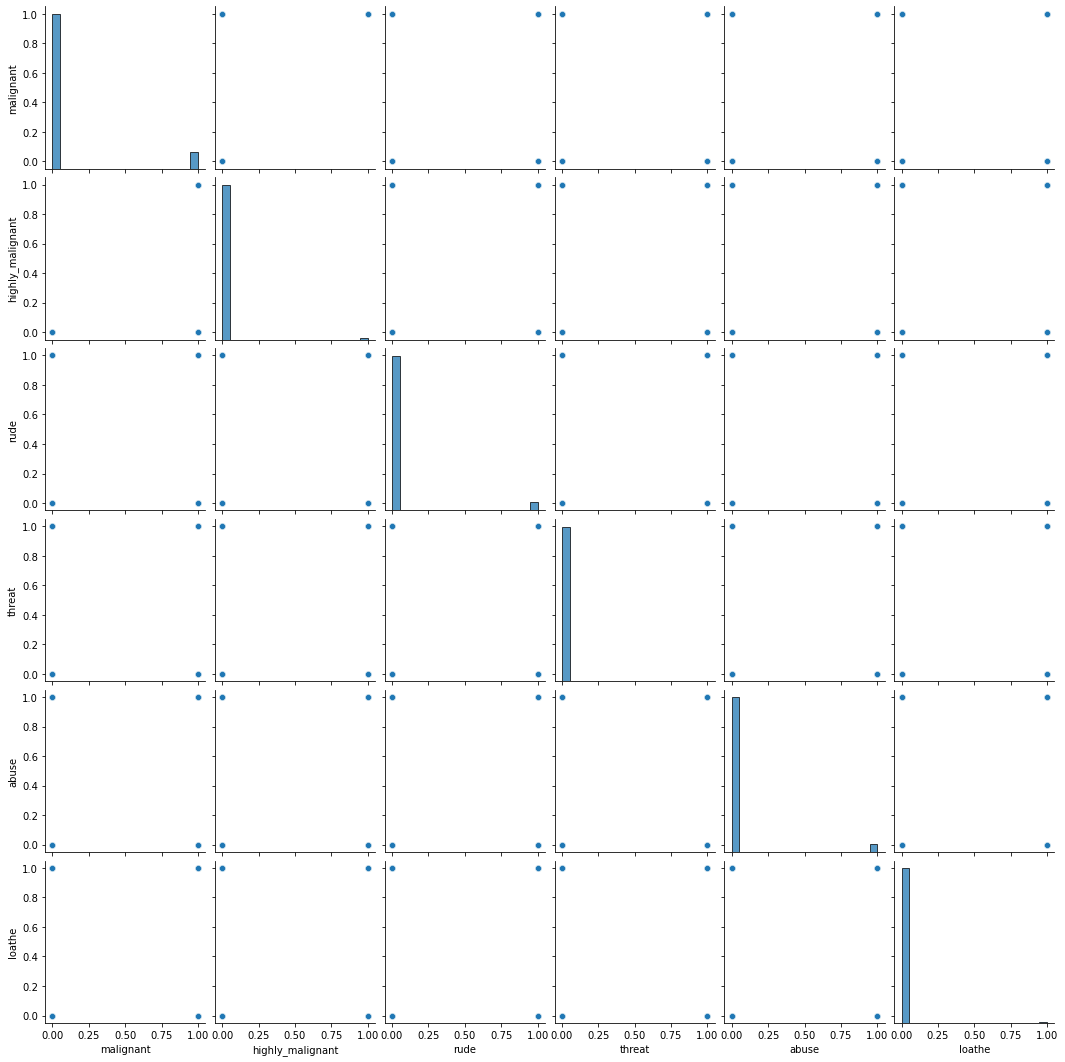

In [25]:
sns.pairplot(df)

In [26]:
df.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [29]:
df.dtypes

comment_text        int32
malignant           int64
highly_malignant    int64
rude                int64
threat              int64
abuse               int64
loathe              int64
dtype: object

In [30]:
corr = df.corr()
corr

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
comment_text,1.000000,0.132016,0.057627,0.104020,0.026093,0.111724,0.046234
malignant,0.132016,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.057627,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.104020,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.026093,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.111724,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.046234,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


In [31]:
corr_mat = df.corr()
corr_mat['malignant'].sort_values(ascending=False)

malignant           1.000000
rude                0.676515
abuse               0.647518
highly_malignant    0.308619
loathe              0.266009
threat              0.157058
comment_text        0.132016
Name: malignant, dtype: float64

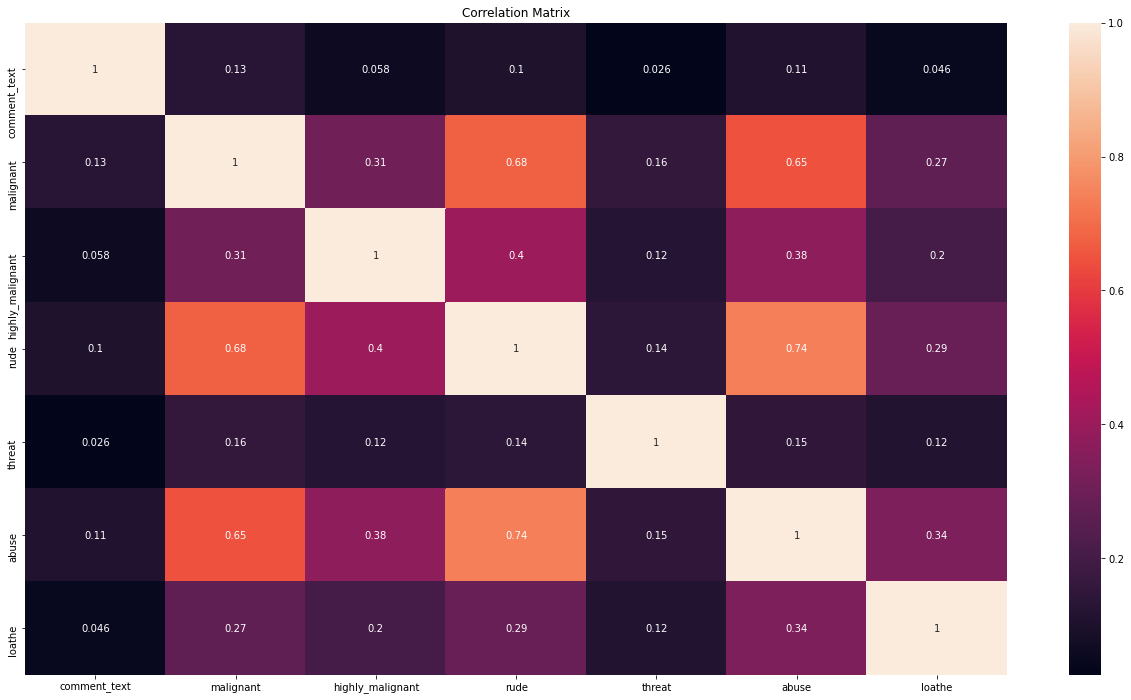

In [32]:
plt.figure(figsize=[22,12])
sns.heatmap(corr,annot=True)
plt.title('Correlation Matrix')
plt.show()

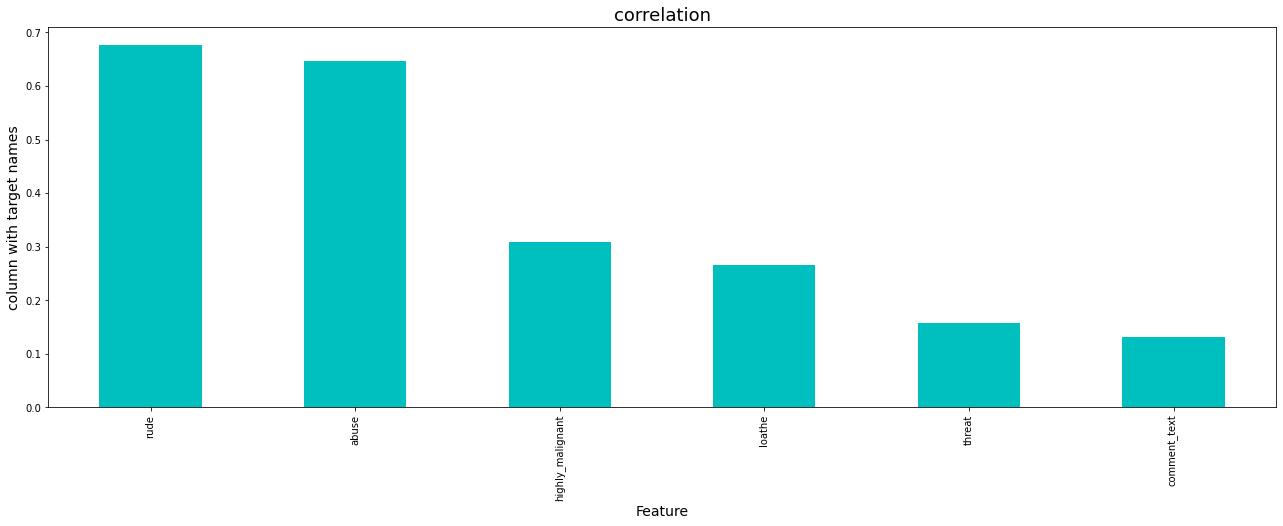

In [33]:
plt.figure(figsize=(22,7))
df.corr()['malignant'].sort_values(ascending=False).drop(['malignant']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

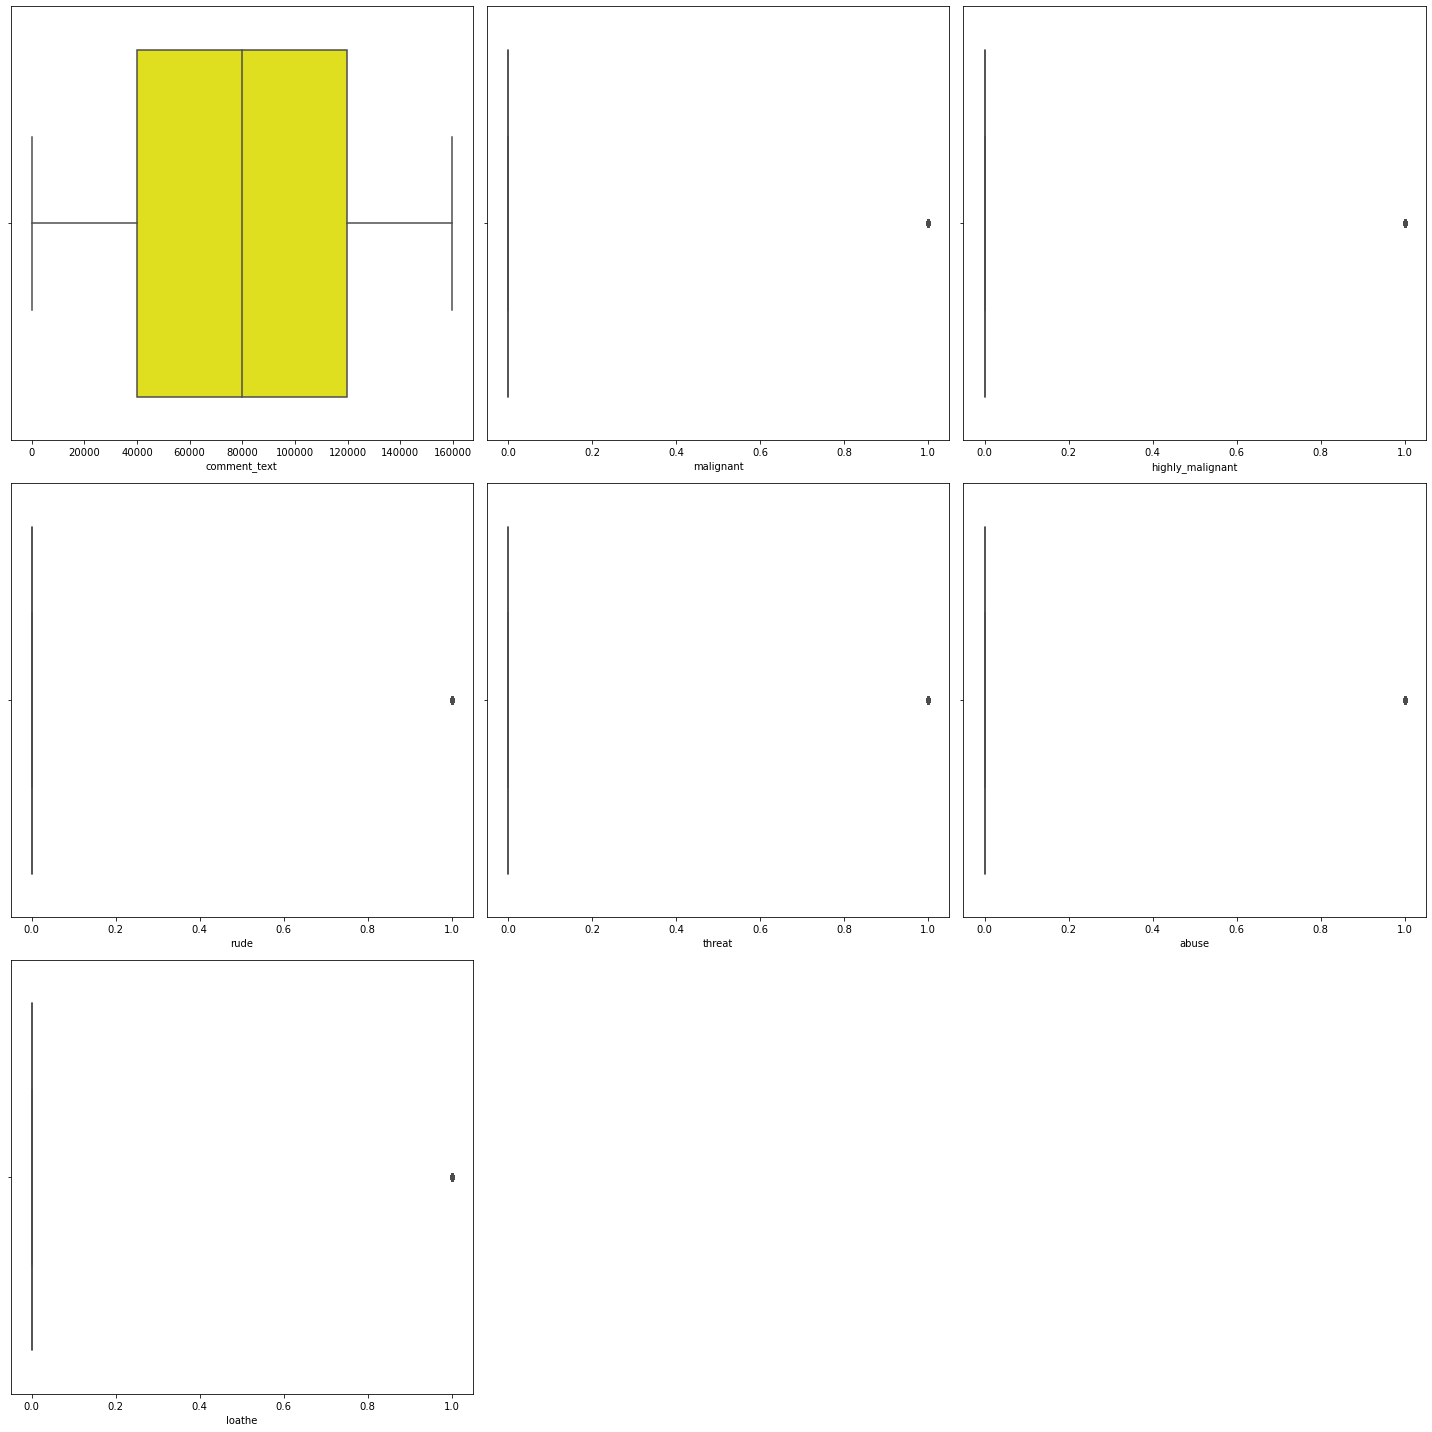

In [34]:
collist=df.columns.values
ncol=3
nrows=3
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='yellow')
    plt.tight_layout()

In [35]:
dfCountCols = df[['highly_malignant','rude','threat','abuse','loathe']]

In [36]:
from scipy.stats import zscore
z = np.abs(zscore(dfCountCols))
df_new=df[(z<3).all(axis=1)]

In [37]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new.shape[0])/df.shape[0])


shape before and after
shape before         : (159571, 7)
shape after          : (149012, 7)
Percentage Loss      : 0.06617117145345959


In [38]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#df_new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [39]:
dfCountCols = df[['highly_malignant','rude','threat','abuse','loathe']]

In [40]:
Q1 = dfCountCols.quantile(0.25)
Q3 = dfCountCols.quantile(0.75)
IQR = Q3 - Q1
df_new1 = df[~((dfCountCols < (Q1 - 1.5 * IQR)) |(dfCountCols > (Q3 + 1.5 * IQR))).any(axis=1)]


In [41]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new1.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new1.shape[0])/df.shape[0])


shape before and after
shape before         : (159571, 7)
shape after          : (149012, 7)
Percentage Loss      : 0.06617117145345959


In [42]:
catg = df.select_dtypes('object')
cont = df.select_dtypes('number')

In [43]:
cont=df.drop(columns=['malignant'],axis=1)
y=df['malignant']

In [44]:
cont.skew()

comment_text        1.282301e-19
highly_malignant    9.851722e+00
rude                3.992817e+00
threat              1.818900e+01
abuse               4.160540e+00
loathe              1.051592e+01
dtype: float64

In [45]:
from sklearn.preprocessing import power_transform
df_new=power_transform(cont)

In [46]:
df_new=pd.DataFrame(df_new,columns=cont.columns)

In [47]:
df_new.skew()

comment_text        -0.291555
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

In [48]:
x = df.drop(columns=['malignant'],axis=1)
y=df['malignant']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [51]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.932382185828877 on Random_state 13


In [52]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.30,random_state=maxRS)

In [53]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()


In [54]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print('accuracy_score',accuracy_score(y_test,y_pred))
print('confusion_matrix',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

accuracy_score 0.9591619318181818
confusion_matrix [[43123   256]
 [ 1699  2794]]
classification_report               precision    recall  f1-score   support

           0       0.96      0.99      0.98     43379
           1       0.92      0.62      0.74      4493

    accuracy                           0.96     47872
   macro avg       0.94      0.81      0.86     47872
weighted avg       0.96      0.96      0.96     47872



In [55]:
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print('confusuon_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

accuracy_score 0.9324030748663101
confusuon_matrix [[41768  1611]
 [ 1625  2868]]
classification_report               precision    recall  f1-score   support

           0       0.96      0.96      0.96     43379
           1       0.64      0.64      0.64      4493

    accuracy                           0.93     47872
   macro avg       0.80      0.80      0.80     47872
weighted avg       0.93      0.93      0.93     47872



In [56]:
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print('confusion_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

accuracy_score 0.9322359625668449
confusion_matrix [[41770  1609]
 [ 1635  2858]]
classification_report               precision    recall  f1-score   support

           0       0.96      0.96      0.96     43379
           1       0.64      0.64      0.64      4493

    accuracy                           0.93     47872
   macro avg       0.80      0.80      0.80     47872
weighted avg       0.93      0.93      0.93     47872



In [57]:
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print('confusion_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

accuracy_score 0.9595379344919787
confusion_matrix [[43109   270]
 [ 1667  2826]]
classification_report               precision    recall  f1-score   support

           0       0.96      0.99      0.98     43379
           1       0.91      0.63      0.74      4493

    accuracy                           0.96     47872
   macro avg       0.94      0.81      0.86     47872
weighted avg       0.96      0.96      0.96     47872



In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.9041555170041183


In [60]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.9285083220138926


In [61]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.9286649930673487


In [62]:
print(cross_val_score(gb,x,y,cv=5).mean())

0.9586265734861955


In [63]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid_param = {'learning_rate':[0.1,0.3,0.6,0.9,0.11],
              'n_estimators':[2,4,6,8,10,12,14,16,100],
              'min_samples_split':[2,3,5,9,11,15,19,28]}
grid_search = GridSearchCV(estimator=gb,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)
              
              

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.6, 0.9, 0.11],
                         'min_samples_split': [2, 3, 5, 9, 11, 15, 19, 28],
                         'n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 100]})

In [68]:
grid_search.best_params_

{'learning_rate': 0.3, 'min_samples_split': 2, 'n_estimators': 16}

In [69]:
Final_mod = GradientBoostingClassifier(learning_rate=0.3,min_samples_split=2,n_estimators=16)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc*100)



95.91619318181817


In [70]:
import joblib
joblib.dump(Final_mod,'malignant comments.pkl')

['malignant comments.pkl']